In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


C:\Users\Aditya\AppData\Local\Temp\ipykernel_17128\977834684.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


LOADING DATA

In [3]:
movies_df = pd.read_csv('.\Dataset\data\merged_dataset_cleaned.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_17128\2108400880.py:1: SyntaxWarning: invalid escape sequence '\D'
  movies_df = pd.read_csv('.\Dataset\data\merged_dataset_cleaned.csv')


In [4]:
movies_df.shape

(1118499, 22)

In [5]:
movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_title,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [6]:
movies_df.isna().sum()

id                           0
title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            178749
revenue                      0
runtime                      0
adult                        0
budget                       0
imdb_id                 520576
original_language            0
original_title              13
popularity                   0
genres                  445365
production_companies    611555
production_countries    492098
spoken_languages        473656
keywords                813093
directors               854197
writers                 879182
primary_director        854197
dtype: int64

DATA PREPROCESSING

In [7]:
movies_df.dropna(inplace=True)

In [8]:
# Even after removing the null values, we still have enough data to move ahead
movies_df.shape

(82703, 22)

In [9]:
movies_df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.270300e+04,82703.000000,82703.000000,8.270300e+04,82703.000000,8.270300e+04,82703.000000
mean,2.810817e+05,5.185295,230.055935,8.360483e+06,92.847333,3.083847e+06,5.890876
std,2.671363e+05,2.309306,1156.868330,5.868179e+07,30.269645,1.552116e+07,24.375741
min,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,5.723800e+04,4.664500,2.000000,0.000000e+00,82.000000,0.000000e+00,1.162000
50%,2.128360e+05,5.833000,9.000000,0.000000e+00,93.000000,0.000000e+00,2.253000
75%,4.218140e+05,6.647000,49.000000,0.000000e+00,105.000000,0.000000e+00,6.038000
max,1.370747e+06,10.000000,34495.000000,2.923706e+09,1265.000000,4.600000e+08,2994.357000


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82703 entries, 0 to 1118455
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    82703 non-null  int64  
 1   title                 82703 non-null  object 
 2   vote_average          82703 non-null  float64
 3   vote_count            82703 non-null  int64  
 4   status                82703 non-null  object 
 5   release_date          82703 non-null  object 
 6   revenue               82703 non-null  int64  
 7   runtime               82703 non-null  int64  
 8   adult                 82703 non-null  bool   
 9   budget                82703 non-null  int64  
 10  imdb_id               82703 non-null  object 
 11  original_language     82703 non-null  object 
 12  original_title        82703 non-null  object 
 13  popularity            82703 non-null  float64
 14  genres                82703 non-null  object 
 15  production_companies  

In [10]:
# Some other pre processing and type conversions are required before we can proceed with the 
# model building process. We will convert the genre column into a list of genres and then convert them 
# into dummy variables. We will also convert the rating column into a binary column where 1 indicates a hit 
# and 0 indicates a flop.
# # Other pre processing steps, 
# 1. remove the dollar sign in Budget and conver the column to numerical field.
# 2. conver the release date to datetime field.
# 3. Convert the runtime to time field(minutes).
# 4. Convert rating count to numerical field. 
# 5. make bins of the rating field to create the target variable field of HIT, AVERAGE, FLOP.
# 6. remove the unnamed field from the begining of the dataset.

# and name the final dataset as movies_cleaned.csv

## But, before all this, we will remove the non significant columns from the dataset. 

Since, Movies title, original title, ID, imdb_id, Status, directors(Keeping the primary directors only) won't be affecting whether the movies is a hit, avergae or flop

NOTE: This assumption might be wrong, or some extra features could be removed as well. 
We will update the features as we move ahead.

In [11]:
movies_df.drop(columns=['imdb_id', 'original_title', 'release_date', 'status', 'id'], axis=1, inplace=True)

In [12]:
movies_df.drop(columns=['title'], axis=1, inplace=True)

In [13]:
movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.364,34495,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.417,32571,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.512,30619,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.573,29815,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.710,29166,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82703 entries, 0 to 1118455
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          82703 non-null  float64
 1   vote_count            82703 non-null  int64  
 2   revenue               82703 non-null  int64  
 3   runtime               82703 non-null  int64  
 4   adult                 82703 non-null  bool   
 5   budget                82703 non-null  int64  
 6   original_language     82703 non-null  object 
 7   popularity            82703 non-null  float64
 8   genres                82703 non-null  object 
 9   production_companies  82703 non-null  object 
 10  production_countries  82703 non-null  object 
 11  spoken_languages      82703 non-null  object 
 12  keywords              82703 non-null  object 
 13  directors             82703 non-null  object 
 14  writers               82703 non-null  object 
 15  primary_director      

In [15]:
movies_df.to_csv('.\Dataset\data\movies_cleaned_80k.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_17128\1116613204.py:1: SyntaxWarning: invalid escape sequence '\D'
  movies_df.to_csv('.\Dataset\data\movies_cleaned_80k.csv', index=False)


In [16]:
# The data objects are properly fomatted now. 
# We can move forward with the visualisation of the data.

DATA VISUALISATION

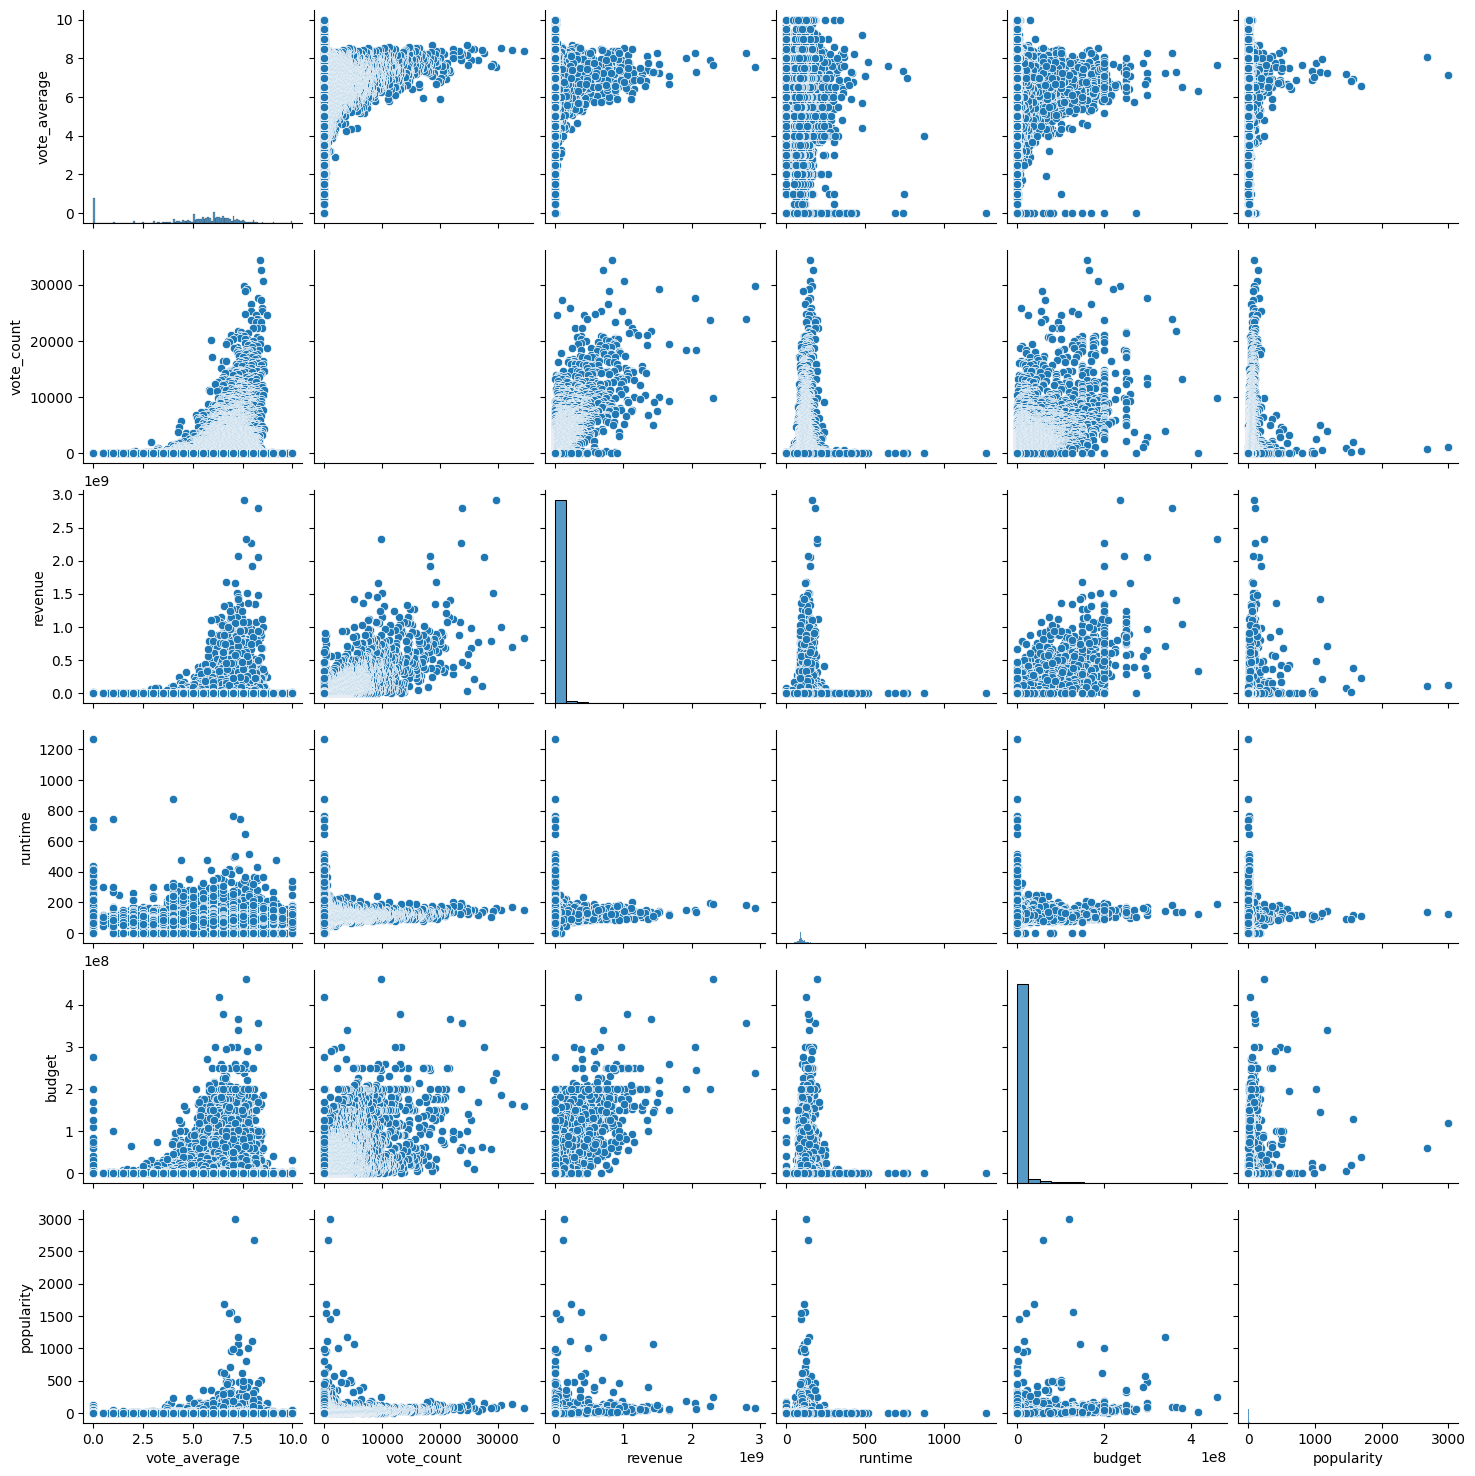

In [16]:
# Selecting a subset of columns for pair plotting
subset = movies_df[['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']]

# Creating pair plots
sns.pairplot(subset)
plt.show()


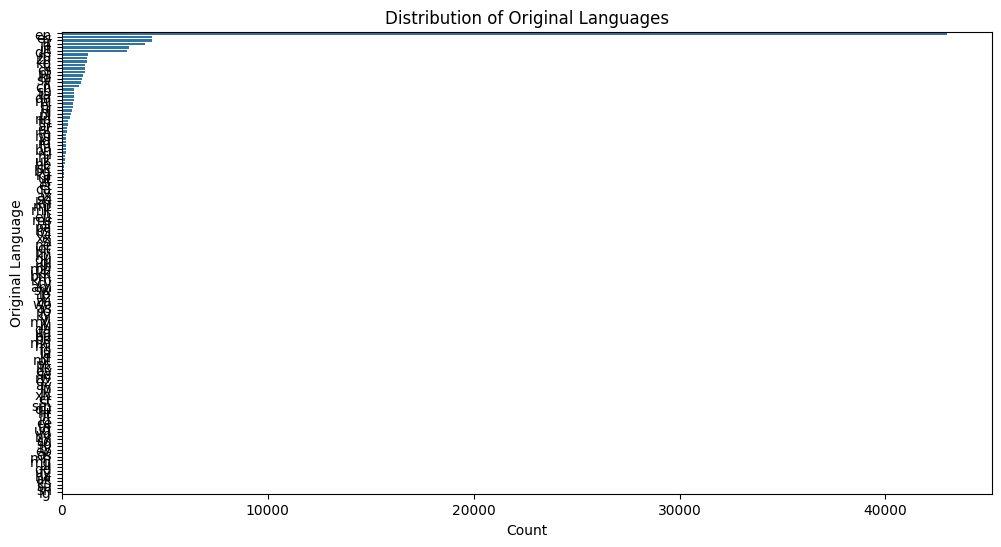

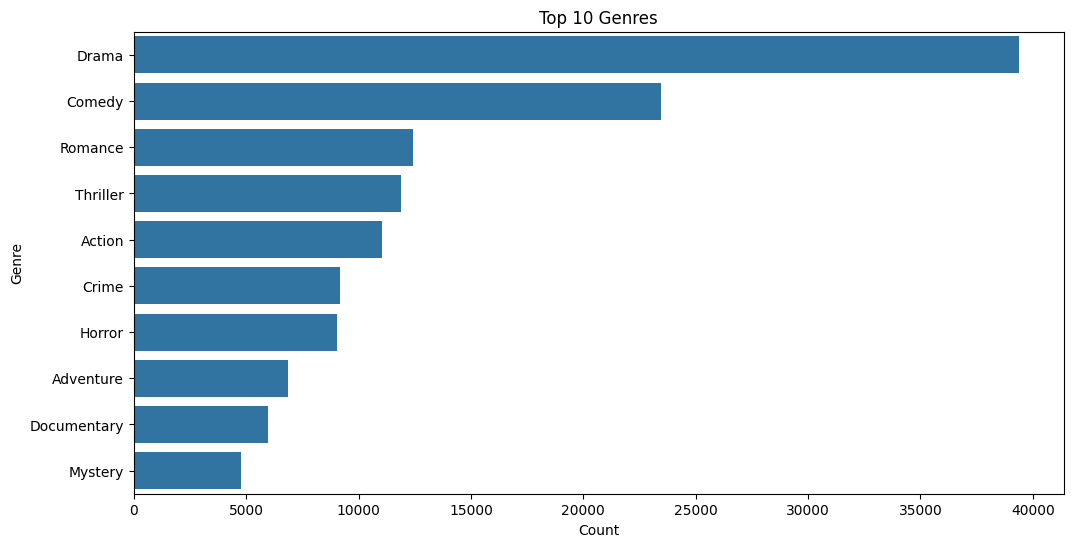

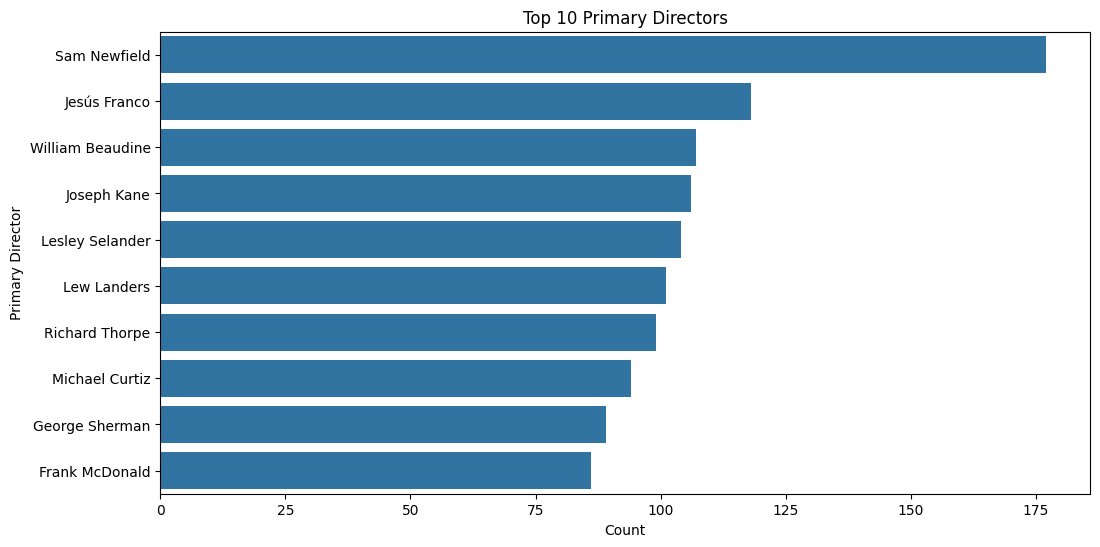

In [17]:
# Plotting the distribution of original languages
plt.figure(figsize=(12, 6))
sns.countplot(y='original_language', data=movies_df, order=movies_df['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.show()

# Plotting the top 10 genres
plt.figure(figsize=(12, 6))
top_genres = movies_df['genres'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Plotting the top 10 primary directors
plt.figure(figsize=(12, 6))
top_directors = movies_df['primary_director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Primary Directors')
plt.xlabel('Count')
plt.ylabel('Primary Director')
plt.show()

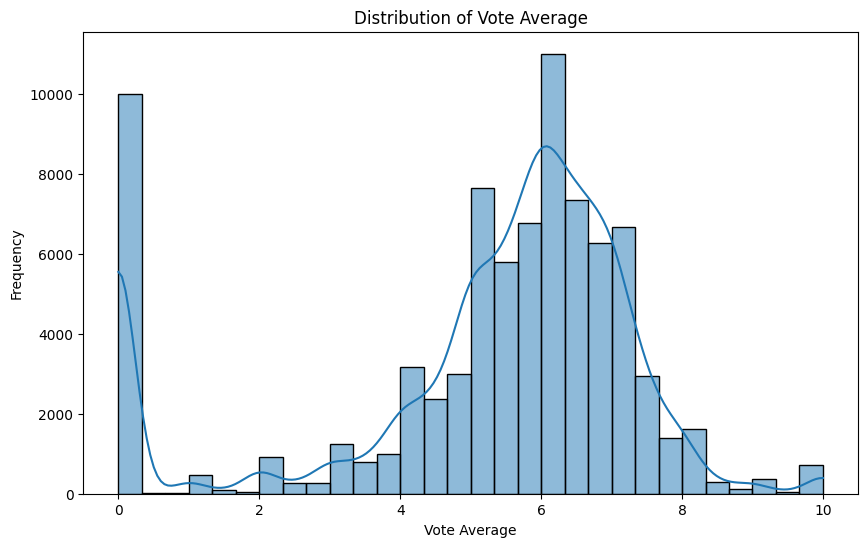

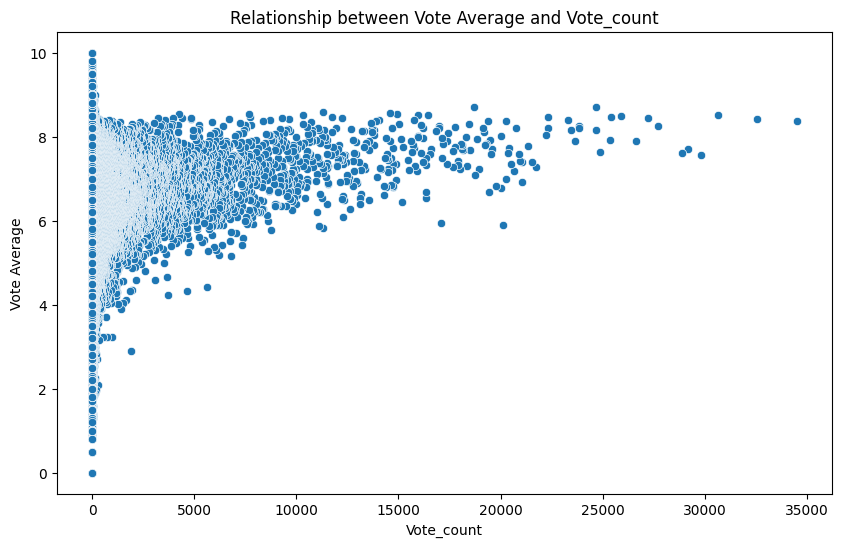

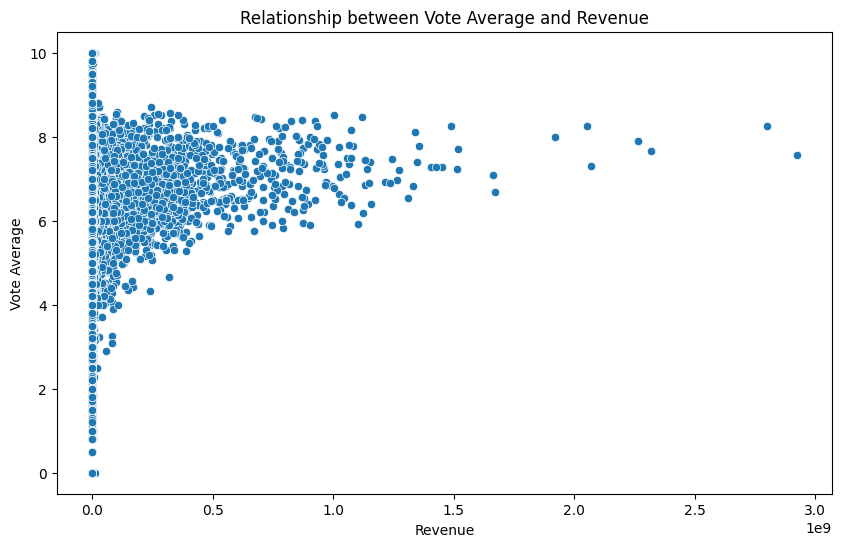

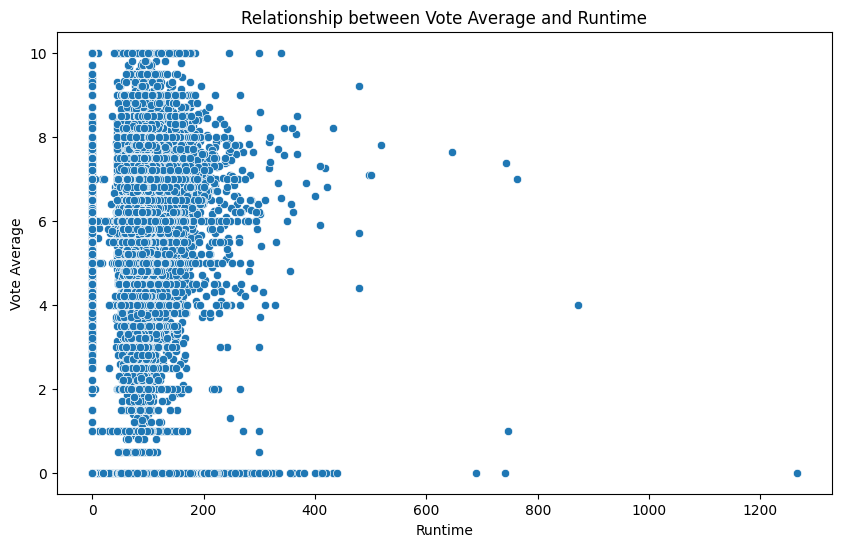

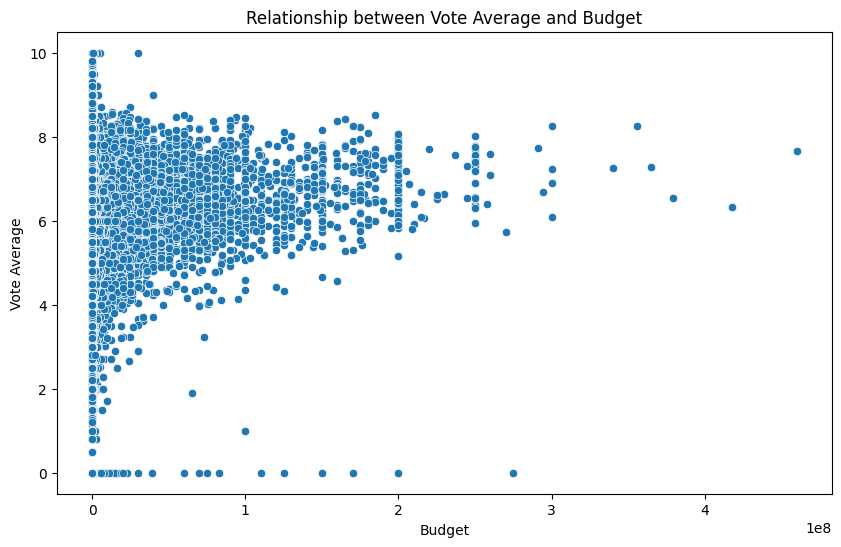

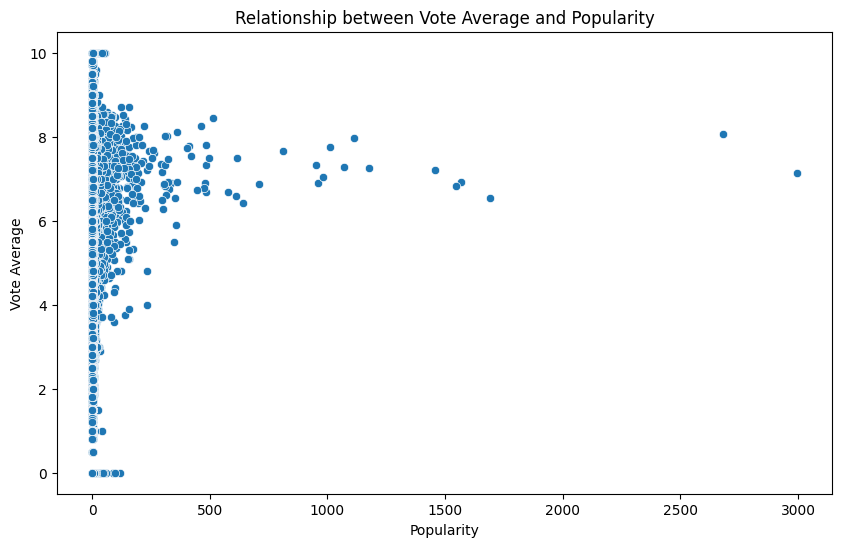

In [18]:
# Plotting the distribution of vote_average
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between vote_average and other numerical features
numerical_features = ['vote_count', 'revenue', 'runtime', 'budget', 'popularity']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=movies_df[feature], y=movies_df['vote_average'])
    plt.title(f'Relationship between Vote Average and {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Vote Average')
    plt.show()

APPLYING LABEL ENCODING TRANSFORMATION AS THE FIRST STEP TOWARDS MODEL TRAINING, 
WE WILL BE FOLLOWING OTHER RELEVANT STEPS TO IMPROVE MODEL'S ACCURACY

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.364,34495,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.417,32571,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.512,30619,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.573,29815,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.710,29166,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [21]:
movies_df = movies_df.drop(columns=['directors'], axis=1)

In [22]:

# List of categorical columns
categorical_columns = ['original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'adult', 'writers', 'primary_director']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    movies_df[column] = le.fit_transform(movies_df[column])
    label_encoders[column] = le

movies_df.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director
0,8.364,34495,825532764,148,0,160000000,24,83.952,617,26771,4005,1142,49628,11296,5635
1,8.417,32571,701729206,169,0,165000000,24,140.241,1008,26770,4005,822,49578,33871,5635
2,8.512,30619,1004558444,152,0,185000000,24,130.643,2560,12236,4005,1587,30838,33873,5635
3,7.573,29815,2923706026,162,0,237000000,24,79.932,146,14168,4181,1744,22215,28886,13325
4,7.710,29166,1518815515,143,0,220000000,24,98.082,4524,29825,4038,1384,40918,34694,15951


In [23]:
movies_df.describe()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director
count,82703.000000,82703.000000,8.270300e+04,82703.000000,82703.000000,8.270300e+04,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000,82703.000000
mean,5.185295,230.055935,8.360483e+06,92.847333,0.005078,3.083847e+06,38.622795,5.890876,2632.212640,27840.303677,3087.846741,1671.038463,33111.788073,35095.170816,16879.227791
std,2.309306,1156.868330,5.868179e+07,30.269645,0.071082,1.552116e+07,28.300713,24.375741,1229.292524,15553.311788,1131.244502,1004.908787,19347.264604,20230.907937,9559.401168
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.664500,2.000000,0.000000e+00,82.000000,0.000000,0.000000e+00,24.000000,1.162000,1853.000000,14406.500000,2513.000000,822.000000,16155.500000,17557.500000,8898.000000
50%,5.833000,9.000000,0.000000e+00,93.000000,0.000000,0.000000e+00,24.000000,2.253000,2536.000000,29235.000000,3630.000000,1007.000000,33567.000000,35131.000000,16733.000000
75%,6.647000,49.000000,0.000000e+00,105.000000,0.000000,0.000000e+00,46.000000,6.038000,3246.000000,41074.000000,4038.000000,2690.000000,50016.500000,52627.500000,25382.000000
max,10.000000,34495.000000,2.923706e+09,1265.000000,1.000000,4.600000e+08,131.000000,2994.357000,5288.000000,53804.000000,4233.000000,3500.000000,65039.000000,69980.000000,33298.000000


<Axes: >

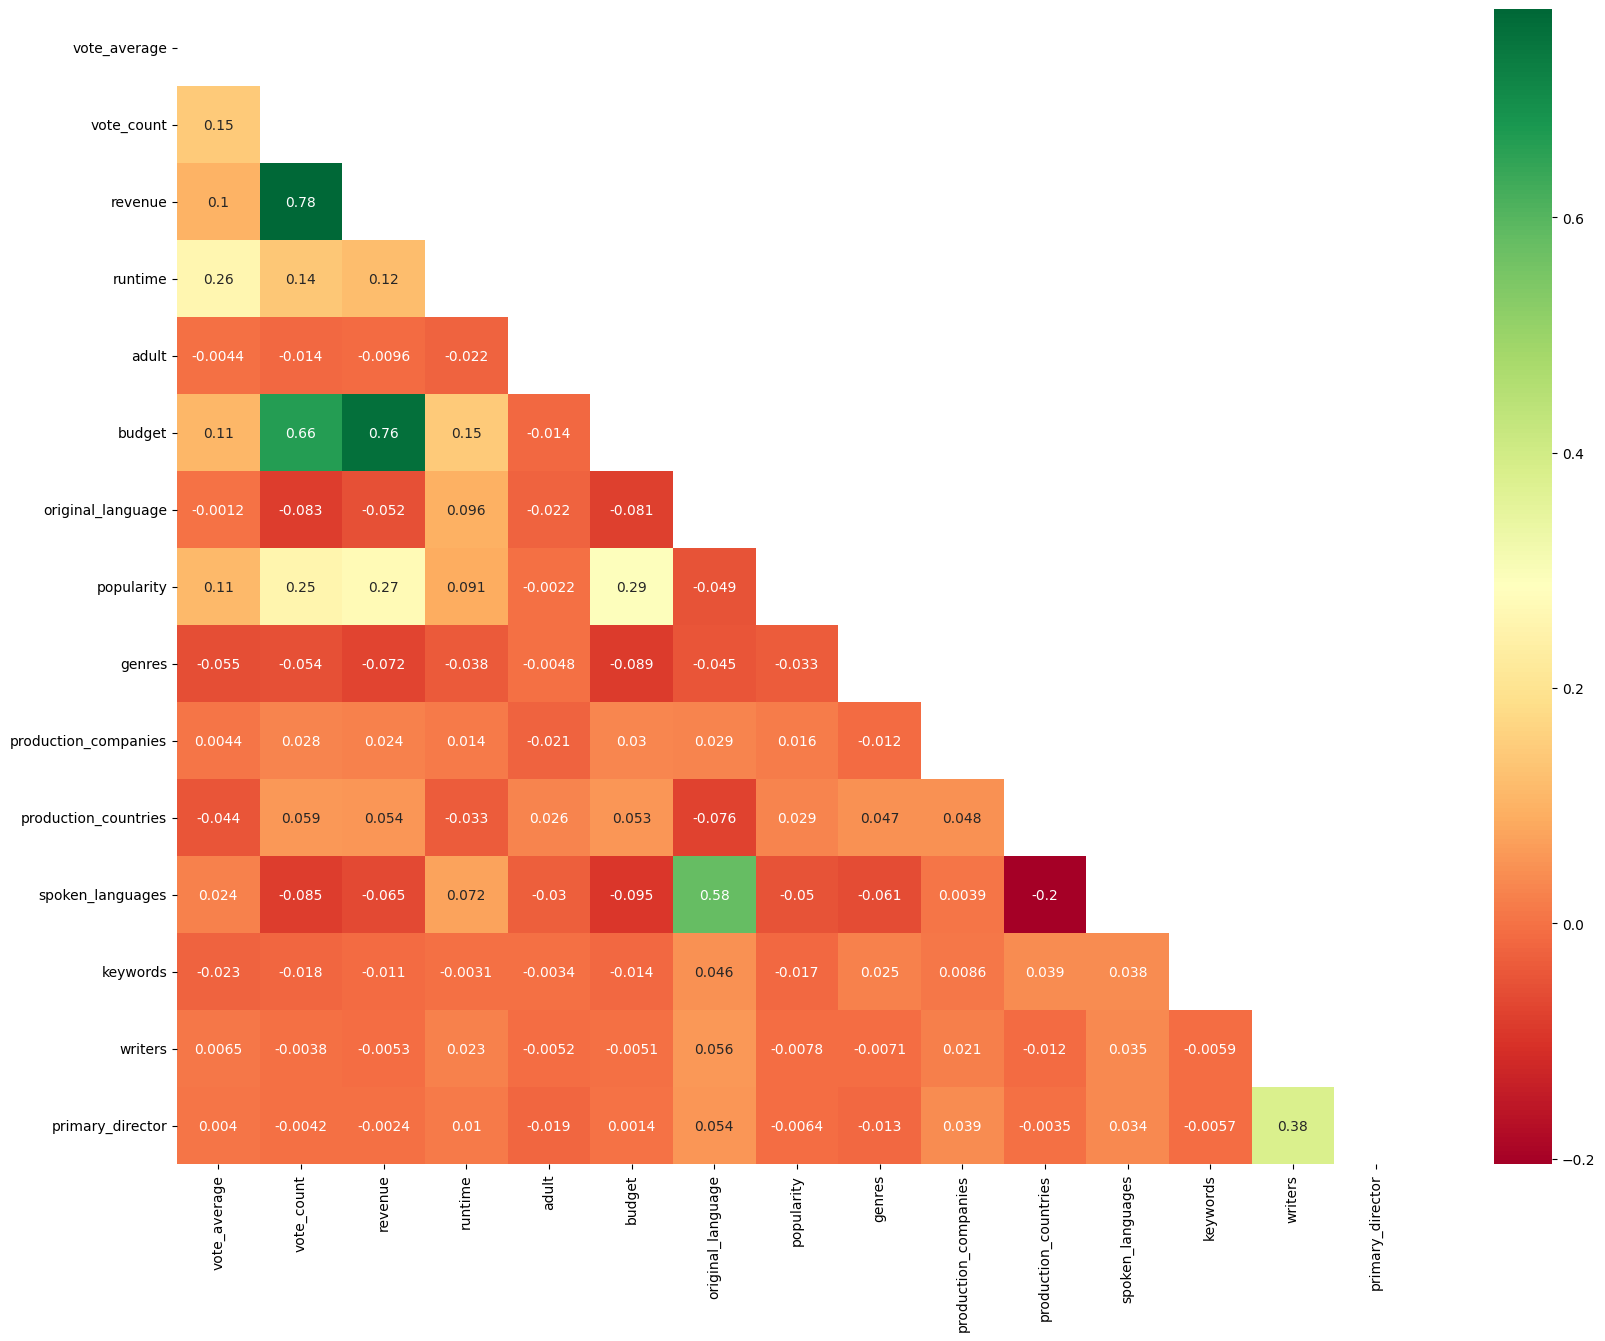

In [24]:
corr = movies_df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [25]:
# removing revenue as it brings multicollinearity in the dataset
movies_df.drop(columns=['revenue'],inplace=True)

In [26]:
# Creating bins to convert the rating column(vote_average) into a binary column
movies_df['target'] = pd.cut(movies_df['vote_average'], bins = [-float('inf'), 4, 7, float('inf')], labels=['Flop', 'Average', 'Hit'])
# Bins are created as
# -> Flop: Rating less than 4
# -> Average: Rating between 4 and 7
# -> Hit: Rating greater than 7

In [27]:
movies_df['target'].value_counts()

target
Average    54092
Flop       16592
Hit        12019
Name: count, dtype: int64

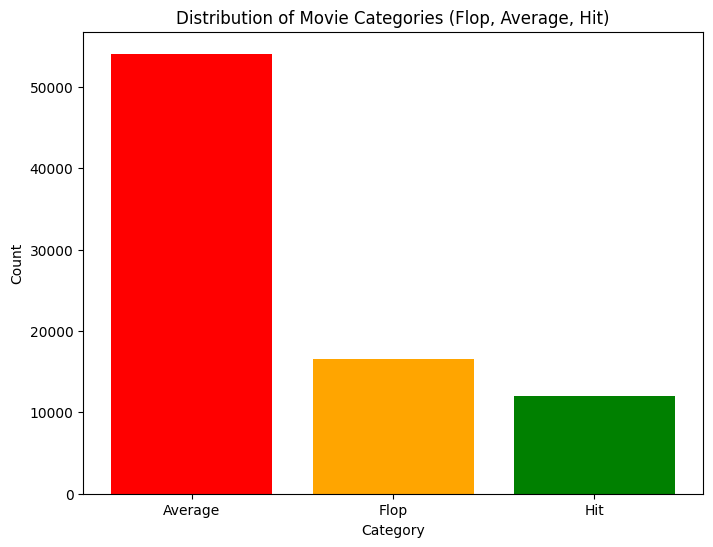

In [28]:
target_counts = movies_df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['red', 'orange', 'green'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Movie Categories (Flop, Average, Hit)')

# Show the plot
plt.show()

In [29]:
movies_df.drop(columns=['vote_average'],inplace=True)

In [30]:
movies_df.head()


,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director,target
0,34495,148,0,160000000,24,83.952,617,26771,4005,1142,49628,11296,5635,Hit
1,32571,169,0,165000000,24,140.241,1008,26770,4005,822,49578,33871,5635,Hit
2,30619,152,0,185000000,24,130.643,2560,12236,4005,1587,30838,33873,5635,Hit
3,29815,162,0,237000000,24,79.932,146,14168,4181,1744,22215,28886,13325,Hit
4,29166,143,0,220000000,24,98.082,4524,29825,4038,1384,40918,34694,15951,Hit


Model building starting
Starting with lazy predictor
reference link: https://github.com/shankarpandala/lazypredict?authuser=0

In [31]:

X = movies_df.drop(columns=['target'], axis=1)
y = movies_df['target']
# Encode the target variable y


In [32]:
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:\n", y.isna().sum())

Missing values in X:
 vote_count              0
runtime                 0
adult                   0
budget                  0
original_language       0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
writers                 0
primary_director        0
dtype: int64
Missing values in y:
 0


In [33]:
print(X.head())
print(y.head())

   vote_count  runtime  adult     budget  original_language  popularity  \
0       34495      148      0  160000000                 24      83.952   
1       32571      169      0  165000000                 24     140.241   
2       30619      152      0  185000000                 24     130.643   
3       29815      162      0  237000000                 24      79.932   
4       29166      143      0  220000000                 24      98.082   

   genres  production_companies  production_countries  spoken_languages  \
0     617                 26771                  4005              1142   
1    1008                 26770                  4005               822   
2    2560                 12236                  4005              1587   
3     146                 14168                  4181              1744   
4    4524                 29825                  4038              1384   

   keywords  writers  primary_director  
0     49628    11296              5635  
1     49578    3

In [34]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, columns=['target'])

In [35]:
print(label_encoder.classes_)

['Average' 'Flop' 'Hit']


In [36]:
y.head()


,target
0,2
1,2
2,2
3,2
4,2


In [37]:
y.value_counts()

target
0         54092
1         16592
2         12019
Name: count, dtype: int64

In [38]:
# from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


In [39]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and run LazyClassifiertask with no custom metrics
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [41]:
# models

In [40]:
## TRYING LAZY predict with one hot encoding
movies_df_ohe = pd.read_csv('.\Dataset\data\movies_cleaned_80k.csv')


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_17128\3180632036.py:2: SyntaxWarning: invalid escape sequence '\D'
  movies_df_ohe = pd.read_csv('.\Dataset\data\movies_cleaned_80k.csv')


In [41]:
movies_df_ohe.head()

,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,primary_director
0,8.364,34495,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Christopher Nolan
1,8.417,32571,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Christopher Nolan
2,8.512,30619,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan
3,7.573,29815,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,James Cameron
4,7.710,29166,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",Joss Whedon


In [42]:
movies_df_ohe.drop(columns=['directors'], axis=1, inplace=True)
movies_df_ohe.drop(columns=['revenue'], axis=1, inplace=True)
# Creating bins to convert the vote_average column into a categorical column
movies_df_ohe['target'] = pd.cut(movies_df_ohe['vote_average'], bins=[0, 4, 6, 10], labels=['Flop', 'Average', 'Hit'])

# Dropping the vote_average column as it is no longer needed
movies_df_ohe.drop(columns=['vote_average'], axis=1, inplace=True)


In [43]:
movies_df_ohe.head()

,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,keywords,writers,primary_director,target
0,34495,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,Hit
1,32571,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...","Jonathan Nolan, Christopher Nolan",Christopher Nolan,Hit
2,30619,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...","Jonathan Nolan, Christopher Nolan, David S. Go...",Christopher Nolan,Hit
3,29815,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,Hit
4,29166,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...","Joss Whedon, Zak Penn",Joss Whedon,Hit


In [46]:
# ## ONE HOT ENCODING TAKES SIGNIFICANT TIME AND SPACE TO EXEUCTE, THUS NOT FOLLOWING THIS APPROACH


# # List of categorical columns
# categorical_columns = ['original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'adult', 'writers', 'primary_director', 'target']


# # Apply One Hot Encoding to each categorical column
# movies_df = pd.get_dummies(movies_df, columns=categorical_columns)

# # Display the first few rows of the dataframe
# movies_df.head()

Best ML model algorithm for this scenario appers to be these
-                         Accuracy	Balanced Accuracy	ROC AUC	   F1 Score	   Time Taken
  Model					
- XGBClassifier	            0.79	         0.62	        None	      0.77	     1.42
- LGBMClassifier	          0.79	         0.61	        None	      0.76	     1.27
- BaggingClassifier	        0.77	         0.61	        None	      0.75	     15.52
- DecisionTreeClassifier	  0.69	         0.60	        None	      0.69	     2.98
- RandomForestClassifier	  0.79	         0.60	        None	      0.75	     17.12

In [44]:
# Initializing and training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


In [45]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     16187
           1       0.68      0.69      0.68      4931
           2       0.33      0.34      0.34      3693

    accuracy                           0.69     24811
   macro avg       0.60      0.60      0.60     24811
weighted avg       0.70      0.69      0.69     24811

Confusion Matrix:
[[12510  1358  2319]
 [ 1290  3410   231]
 [ 2153   272  1268]]


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    decision_tree, 
    param_grid, 
    scoring='f1_macro',  
    cv=5,                
    verbose=1,           
    n_jobs=-1            
)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1)

In [60]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']])

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy:.2f}")

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 Macro Score: 0.6336893128486975
    param_max_depth  param_min_samples_split  param_min_samples_leaf  \
0                 5                        2                       1   
1                 5                        5                       1   
2                 5                       10                       1   
3                 5                        2                       2   
4                 5                        5                       2   
5                 5                       10                       2   
6                 5                        2                       4   
7                 5                        5                       4   
8                 5                       10                       4   
9                10                        2                       1   
10               10                        5                       1   
11            

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Initialize and fit the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [48]:
# Make predictions
y_pred = random_forest.predict(X_test)

In [49]:

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     16187
           1       0.92      0.64      0.76      4931
           2       0.68      0.19      0.30      3693

    accuracy                           0.79     24811
   macro avg       0.79      0.60      0.64     24811
weighted avg       0.79      0.79      0.75     24811

Confusion Matrix:
[[15693   188   306]
 [ 1761  3154    16]
 [ 2928    68   697]]


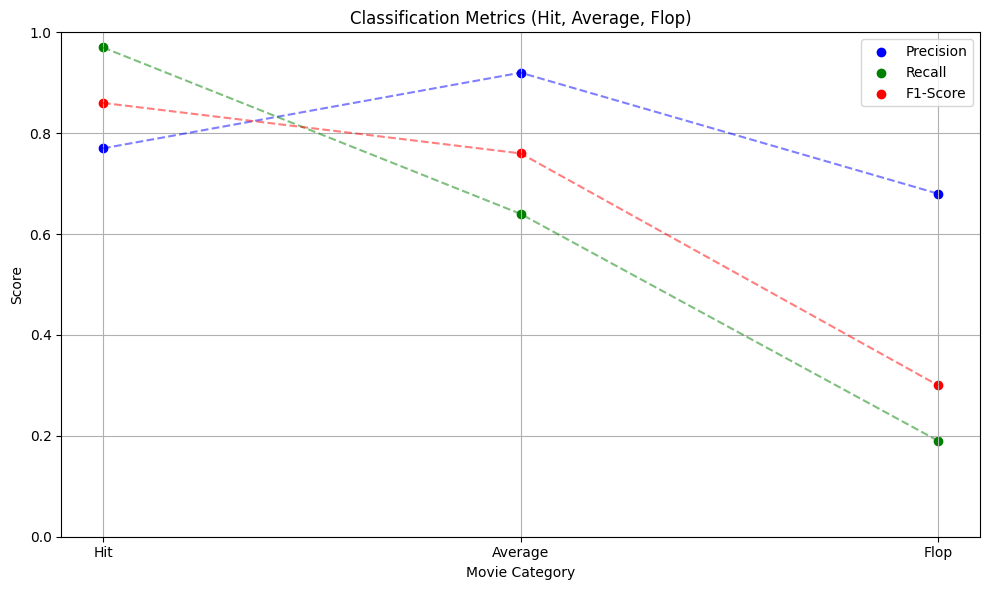

In [51]:
#Classification Graphs:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Hit', 'Average', 'Flop']
precision = [0.77, 0.92, 0.68]
recall = [0.97, 0.64, 0.19]
f1_score = [0.86, 0.76, 0.30]

plt.figure(figsize=(10, 6))
x = np.arange(len(classes))

plt.scatter(x, precision, label="Precision", color='blue')
plt.scatter(x, recall, label="Recall", color='green')
plt.scatter(x, f1_score, label="F1-Score", color='red')

plt.plot(x, precision, color='blue', linestyle='--', alpha=0.5)
plt.plot(x, recall, color='green', linestyle='--', alpha=0.5)
plt.plot(x, f1_score, color='red', linestyle='--', alpha=0.5)

plt.title("Classification Metrics (Hit, Average, Flop)")
plt.xticks(x, classes)
plt.xlabel('Movie Category')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

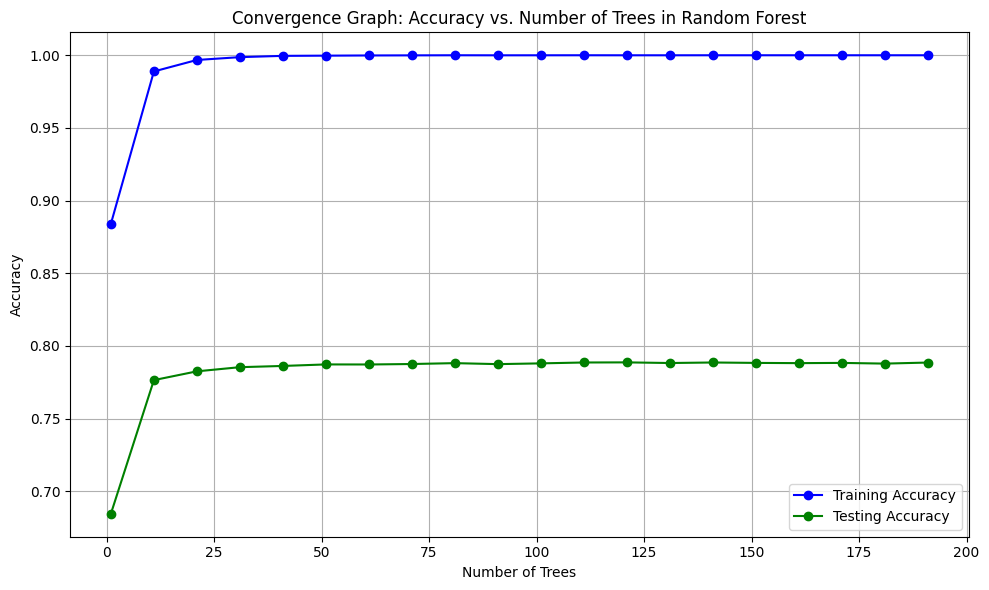

In [ ]:
#Convergence Graphs:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimators_range = np.arange(1, 201, 10)
train_accuracies = []
test_accuracies = []

for n_estimators in estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(estimators_range, test_accuracies, label='Testing Accuracy', marker='o', color='green')

plt.title('Convergence Graph: Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [53]:
print("Based on the RF report, we can conclude that")
print("""
Class 0 (Flop): Precision = 0.77, meaning that 77% of the instances predicted as class 0 were actually class 0.
Class 1 (Average): Precision = 0.92, indicating that 92% of the instances predicted as class 1 were correct.
Class 2 (Hit): Precision = 0.68, meaning that 68% of instances predicted as class 2 were indeed class 2.

      
Class 0: Recall = 0.97, meaning the model correctly identified 97% of the actual class 0 instances.
Class 1: Recall = 0.64, indicating that 64% of the actual class 1 instances were correctly identified.
Class 2: Recall = 0.19, meaning only 19% of the actual class 2 instances were correctly identified.

Other scsores are F1(To balance precision and recall) and Support(No of instances in each class)

Overall, accuracy comes out to be 79 percent. which is same as the accuracy we got using the lazy predict
""")

Based on the RF report, we can conclude that

Class 0 (Flop): Precision = 0.77, meaning that 77% of the instances predicted as class 0 were actually class 0.
Class 1 (Average): Precision = 0.92, indicating that 92% of the instances predicted as class 1 were correct.
Class 2 (Hit): Precision = 0.68, meaning that 68% of instances predicted as class 2 were indeed class 2.

      
Class 0: Recall = 0.97, meaning the model correctly identified 97% of the actual class 0 instances.
Class 1: Recall = 0.64, indicating that 64% of the actual class 1 instances were correctly identified.
Class 2: Recall = 0.19, meaning only 19% of the actual class 2 instances were correctly identified.

Other scsores are F1(To balance precision and recall) and Support(No of instances in each class)

Overall, accuracy comes out to be 79 percent. which is same as the accuracy we got using the lazy predict



In [54]:

# Feature Importances
importances = random_forest.feature_importances_
indices = range(len(importances))

In [55]:
print(importances)
print("Now, based on these scorings, we can consider the fact that features like 'adult', 'budget', 'original_language' are the ones that contributes the least among all other features.")

[0.32469752 0.08213915 0.0012491  0.02239396 0.02779957 0.11835083
 0.06949921 0.0688242  0.03822338 0.03738335 0.07021276 0.07033448
 0.0688925 ]
Now, based on these scorings, we can consider the fact that features like 'adult', 'budget', 'original_language' are the ones that contributes the least among all other features.


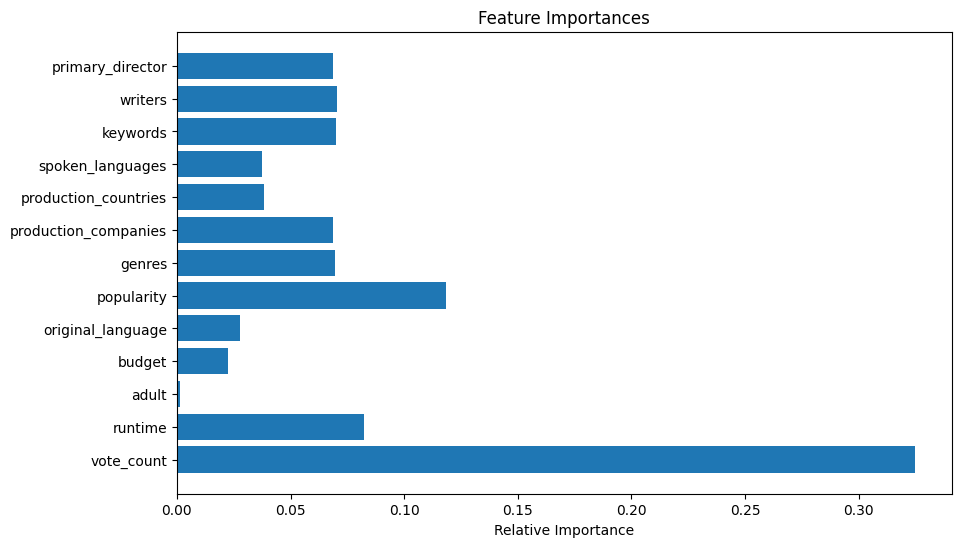

In [56]:

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(indices, importances, align='center')
plt.yticks(indices, movies_df.columns[:-1])
plt.xlabel("Relative Importance")
plt.show()